**Project Repo:** [Project Repository (GitHub)](https://github.com/brwi2400/wine_quality_regression)

# Project Topic
This project aims to model wine quality based on physicochemical tests.

# Data
### Data Source Description:

The dataset used in this project is sourced from the UCI Machine Learning Repository, specifically the "Wine Quality" dataset, curated by Paulo Cortez, A. Cerdeira, Fernando Almeida, Telmo Matos, and J. Reis in 2009. The dataset consists of physicochemical properties of two variants of Portuguese "Vinho Verde" wine: red and white.

### Data Size and Structure:

**Number of Instances**: 4898  
**Number of Features**: 11  
**Feature Types**: Real  
**Output Variable**: Quality (score between 0 and 10)  
**Missing Values**: None  

### Features:  

- fixed_acidity: Continuous
- volatile_acidity: Continuous
- citric_acid: Continuous
- residual_sugar: Continuous
- chlorides: Continuous
- free_sulfur_dioxide: Continuous
- total_sulfur_dioxide: Continuous
- density: Continuous
- pH: Continuous
- sulphates: Continuous
- alcohol: Continuous

### Additional Information:

Due to privacy and logistical reasons, only physicochemical (inputs) and sensory (output) variables are available in the dataset. Information on grape types, wine brand, and selling price is not included.

### Data Source Citation:
Cortez, Paulo, Cerdeira, A., Almeida, F., Matos, T., and Reis, J. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

# Data Cleaning
### Rubric Requirements
To receive full points for this section, the
learner must address the three questions
below:
1. Does it include clear explanations on how
and why a cleaning is performed?
2. Does it have conclusions or discussions?
3. Does it have proper visualizations?

**Note**: if you are using a dataset that is already
clean, you can receive five points if you note
that the dataset is already clean and do not do
anything further for this section.

### Response:
I will do basic visualizations and descriptive statistics to understand the data.  Since the data set is precleaned, this will be little to no actual modification to the structure and fields.

In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# import data
%pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

## Exploratory Data Analysis


In [ ]:
# Build dataframe
df = pd.DataFrame(X).join(y)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: >

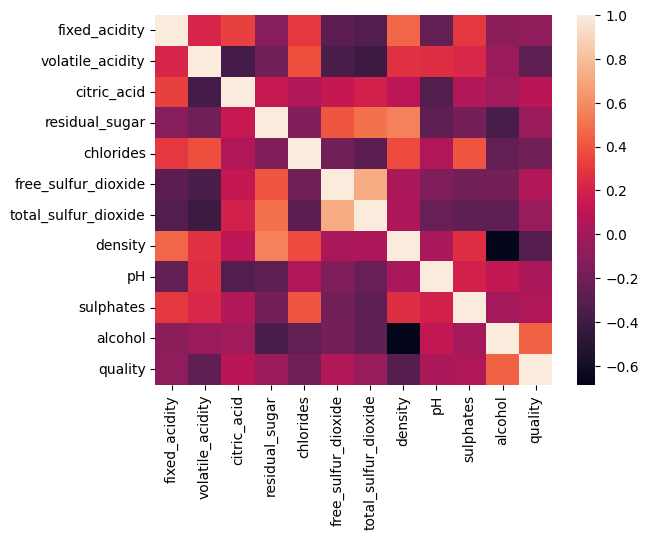

In [ ]:
# @title Correlation Heatmap
sns.heatmap(df.corr())

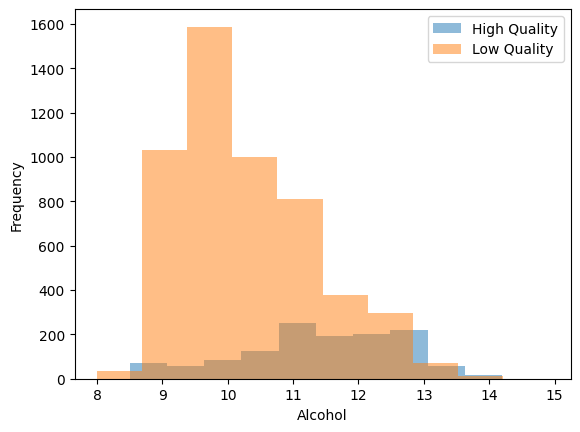

In [ ]:
# @title Alcohol Distribution by Quality

plt.hist(df[df['quality'] >= 7]['alcohol'], alpha=0.5, label='High Quality')
plt.hist(df[df['quality'] < 7]['alcohol'], alpha=0.5, label='Low Quality')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
_ = plt.legend()

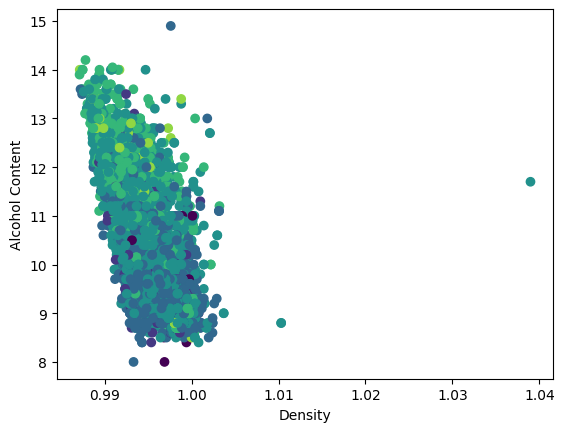

In [ ]:
# @title Density vs alcohol content

plt.scatter(df['density'], df['alcohol'], c=df['quality'])
plt.xlabel('Density')
_ = plt.ylabel('Alcohol Content')

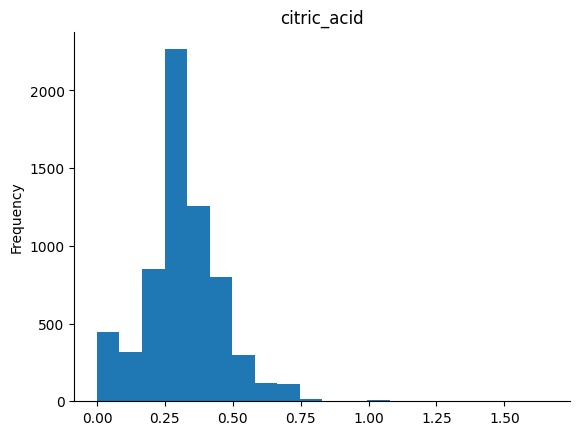

In [ ]:
# @title citric_acid

df['citric_acid'].plot(kind='hist', bins=20, title='citric_acid')
plt.gca().spines[['top', 'right',]].set_visible(False)

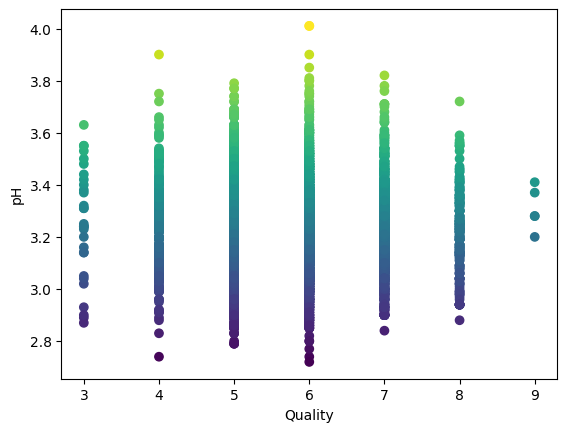

In [ ]:
# @title Quality vs pH

plt.scatter(df['quality'], df['pH'], c=df['pH'])
plt.xlabel('Quality')
_ = plt.ylabel('pH')

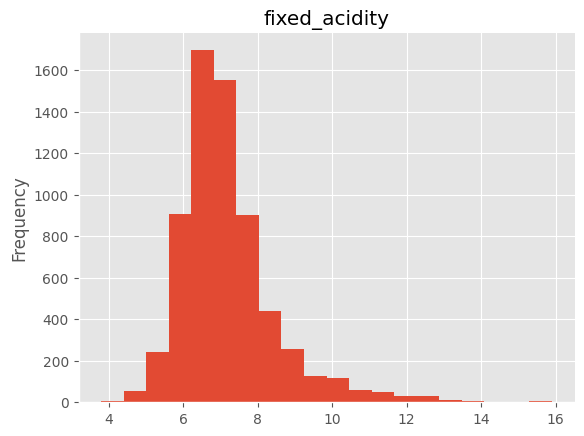

In [ ]:
# @title fixed_acidity

plt.style.use('ggplot')
df['fixed_acidity'].plot(kind='hist', bins=20, title='fixed_acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Conclusion
It seems alcohol content influences quality in the correlation matrix. Most of the features appear normally distributed (skewed right).

# Models

### Linear Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
evals = {}

from sklearn.linear_model import LinearRegression

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
evals['Linear Regression'] = rmse

# Evaluate the model
print(f'R-squared: {model.score(X_test, y_test)}')
print("Root Mean Squared Error (RMSE):", rmse)

R-squared: 0.2597673129771415
Root Mean Squared Error (RMSE): 0.7393892357611402


### LASSO Regression

In [ ]:
from sklearn.linear_model import Lasso

# Lasso Regression
model = Lasso(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
evals['LASSO Regression'] = rmse

# Evaluate the model
print(f'R-squared: {model.score(X_test, y_test)}')
print("Root Mean Squared Error (RMSE):", rmse)

R-squared: 0.0017416836745601794
Root Mean Squared Error (RMSE): 0.858638707928128


### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# Ridge Regression
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
evals['Ridge Regression'] = rmse

# Evaluate the model
print(f'R-squared: {model.score(X_test, y_test)}')
print("Root Mean Squared Error (RMSE):", rmse)

R-squared: 0.25935147478409626
Root Mean Squared Error (RMSE): 0.7395968887871265


# Support Vector Regression

In [ ]:
from sklearn.svm import SVR

y_svm_train = np.array(y_train).ravel()
y_svm_test = np.array(y_test).ravel()

# Support Vector Regression
model = SVR(kernel='rbf')
model.fit(X_train, y_svm_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_svm_test, y_pred))
evals['Support Vector Regression'] = rmse

# # Evaluate the model
print(f'R-squared: {model.score(X_test, y_svm_test)}')
print("Root Mean Squared Error (RMSE):", rmse)

R-squared: 0.1420949667509387
Root Mean Squared Error (RMSE): 0.7959918154776878


### Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regression
model = GradientBoostingRegressor()
model.fit(X_train, y_svm_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_svm_test, y_pred))
evals['Gradient Boosting Regression'] = rmse

# Evaluate the model
print(f'R-squared: {model.score(X_test, y_svm_test)}')
print("Root Mean Squared Error (RMSE):", rmse)

R-squared: 0.3746242337553527
Root Mean Squared Error (RMSE): 0.679609620968838


### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regression
model = RandomForestRegressor()
model.fit(X_train, y_svm_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_svm_test, y_pred))
evals['Random Forest Regression'] = rmse

# Evaluate the model
print(f'R-squared: {model.score(X_test, y_svm_test)}')
print("Root Mean Squared Error (RMSE):", rmse)

R-squared: 0.4901273731236139
Root Mean Squared Error (RMSE): 0.6136487344000388


### ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet

# ElasticNet Regression
model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust the regularization strength and the mix ratio by changing alpha and l1_ratio, respectively
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
evals['ElasticNet Regression'] = rmse

# Evaluate the model
print(f'R-squared: {model.score(X_test, y_test)}')
print("Root Mean Squared Error (RMSE):", rmse)

R-squared: 0.0017792963729204025
Root Mean Squared Error (RMSE): 0.8586225317428604


# Evaluation

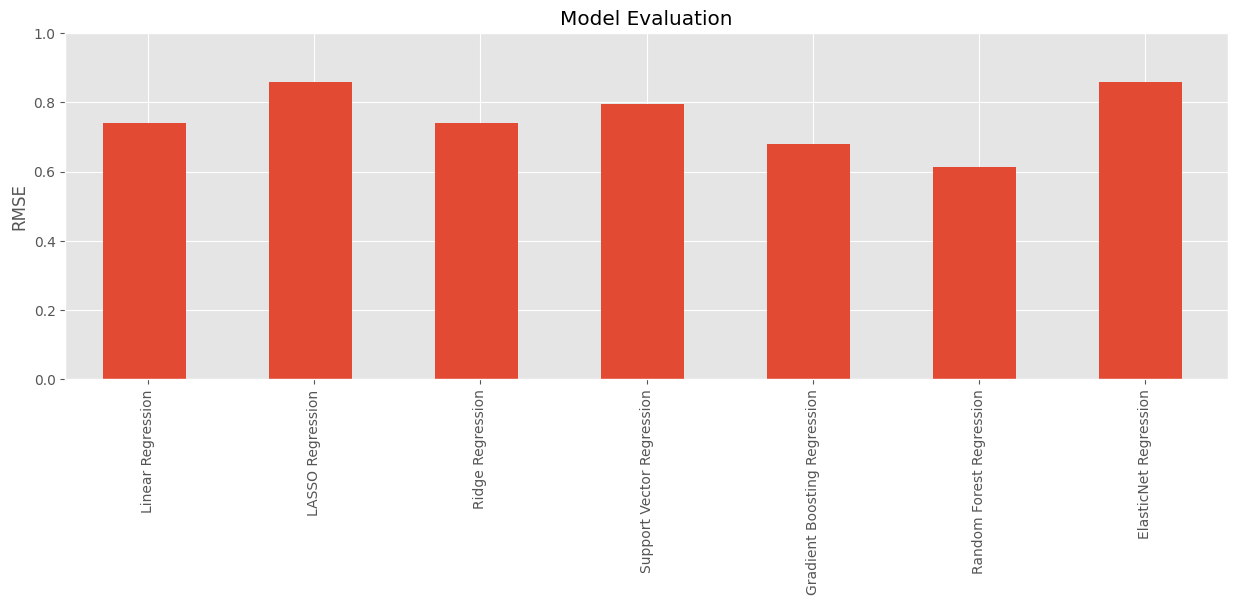

In [ ]:
evals_df = pd.DataFrame(evals.items(), columns=['Model', 'RMSE'])
evals_df.set_index('Model', inplace=True)

ax = evals_df.plot(kind='bar', figsize=(15, 4.5))
ax.set_ylim(0, 1)
ax.set_xlabel(None)
ax.legend().set_visible(False)

plt.title('Model Evaluation')
plt.ylabel('RMSE')

gap = 0.05  # You can adjust this value to increase/decrease the gap between bars
for i, patch in enumerate(ax.patches):
    patch.set_x(patch.get_x() + gap * ((i // len(evals_df)) - len(evals_df.columns) / 2))

# Show the plot
plt.show()

# Optimization: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Convert y_train to 1D array
y_train = np.array(y_train).ravel()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_rmse = np.sqrt(-best_score)

print("Best Parameters:", best_params)
print("Best Score:", best_rmse)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.6160641484959717


# Results & Analysis
For my final model, I ended up using a random forest.  You can see the performance did not improve after cross validation.  The best parameters above as well. I evaluated models with the metrics root mean squared error, and r squared.  RMSE measures the magnitued between predicted values and actual values (error). R squared measures the proportion of variance that is explainable by the independent variables in a given model.